### 0. Introduction YOLOv8

YOLOv8 được chứa trong thư viện ultralytics.

Object detection: là một hình vuông chứ đối tượng và label của đối tượng.

Object detection có 2 bài toán con:
+ 1: Object localization: bounding box.
Có rất nhiều cách xác định nhưng với YOLOv8 thì có format (x_center, y_center, width, height)

+ 2: Object classification.

0.99 là confidence score.

### 1. Dowload and import library

In [1]:
# Tải YOLOv8 thuộc thư viện ultralytics.
%pip install ultralytics
import ultralytics
# kiểm tra xem cài được chưa
ultralytics.checks()

Ultralytics YOLOv8.2.20  Python-3.12.3 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete  (12 CPUs, 15.3 GB RAM, 173.3/237.2 GB disk)


In [4]:
%pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install gdown
%pip install unzip

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached unzip-1.0.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
# thư viên truy cập các tác vụ hệ thống
import os
# thư viện để chuyển đổi file sao chép coppy xóa file
import shutil
# thư viện đọc file yaml
import yaml
# thư viện numpy
import numpy as np
# thư viện dùng để chỉnh sửa bảng
import pandas as pd

import cv2
import json
# thư viện để vẽ hình ảnh
import matplotlib.pyplot as plt

#thư viện chứa YOLO để train.
from ultralytics import YOLO
from PIL import Image
#thư viện chứa các phần như cắt file, thư viện các hàm logictis regressions
from sklearn.model_selection import train_test_split

### 2. Prepare YOLOv8 data

format của folder YOLOv8

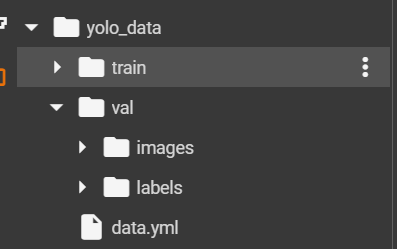

### 2.1. Đối với dữ liệu theo format YOLOv8

In [8]:
# download with gdown:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
#unzip
!unzip cars_yolo_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=5a027563-69dc-464c-b526-bc07b576ea4e
To: c:\Google drive\My Drive\AIO2024\CODESPACE\AIO2024_Course\WARN_UP\10.WARN UP\cars_yolo_data.zip

  0%|          | 0.00/37.7M [00:00<?, ?B/s]
  1%|▏         | 524k/37.7M [00:00<00:32, 1.15MB/s]
  3%|▎         | 1.05M/37.7M [00:00<00:25, 1.41MB/s]
  4%|▍         | 1.57M/37.7M [00:01<00:27, 1.31MB/s]
  6%|▌         | 2.10M/37.7M [00:01<00:27, 1.28MB/s]
  7%|▋         | 2.62M/37.7M [00:02<00:27, 1.27MB/s]
  8%|▊         | 3.15M/37.7M [00:02<00:28, 1.19MB/s]
 10%|▉         | 3.67M/37.7M [00:02<00:26, 1.28MB/s]
 11%|█         | 4.19M/37.7M [00:03<00:27, 1.23MB/s]
 12%|█▏        | 4.72M/37.7M [00:03<00:26, 1.24MB/s]
 14%|█▍        | 5.24M/37.7M [00:04<00:26, 1.24MB/s]
 15%|█▌        | 5.77M/37.7M [00:04<00:25, 1.24MB/s]
 17%|█▋        | 6.29M/37.7M [00:05<00:2

### 2.2. Đối với dữ liệu chưa theo format YOLOv8

In [9]:
# Tải file zip từ ggdrive
!gdown 1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa

Downloading...
From (original): https://drive.google.com/uc?id=1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa
From (redirected): https://drive.google.com/uc?id=1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa&confirm=t&uuid=06e5a05d-a936-4bd0-bee4-b57df3616ada
To: c:\Google drive\My Drive\AIO2024\CODESPACE\AIO2024_Course\WARN_UP\10.WARN UP\car_object_detection.zip

  0%|          | 0.00/118M [00:00<?, ?B/s]
  0%|          | 524k/118M [00:00<01:47, 1.09MB/s]
  1%|          | 1.05M/118M [00:00<01:24, 1.38MB/s]
  1%|▏         | 1.57M/118M [00:01<01:27, 1.32MB/s]
  2%|▏         | 2.10M/118M [00:01<01:29, 1.30MB/s]
  2%|▏         | 2.62M/118M [00:02<01:30, 1.28MB/s]
  3%|▎         | 3.15M/118M [00:02<01:30, 1.26MB/s]
  3%|▎         | 3.67M/118M [00:02<01:32, 1.22MB/s]
  4%|▎         | 4.19M/118M [00:03<01:31, 1.24MB/s]
  4%|▍         | 4.72M/118M [00:03<01:33, 1.21MB/s]
  4%|▍         | 5.24M/118M [00:04<01:34, 1.19MB/s]
  5%|▍         | 5.77M/118M [00:04<01:35, 1.17MB/s]
  5%|▌         | 6.29M/118M [00:05<01:33, 1.19

In [11]:
%pip install unzip

In [16]:
# Unzip file
!unzip car_object_detection.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
train_data_dir = './data/training_images'
label_filepath = './data/train_solution_bounding_boxes (1).csv'

df = pd.read_csv(label_filepath)
df

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [6]:
pil_img = Image.open('./data/testing_images/vid_5_25100.jpg')
img_w, img_h = pil_img.size

#format cua YOLO : x_center, y_center, width, heigh
# convert (x_min, y_min, x_max, y_max) => ( x_center, y_center, width, heigh)

df['class'] = 0
df.rename(columns={'image': 'image_name'}, inplace = True)

df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['bbox_w'] = df['xmax'] - df['xmin']
df['bbox_h'] = df['ymax'] - df['ymin']

#chuẩn hóa dữ liệu
df['x_center'] = df['x_center'] / img_w
df['y_center'] = df['y_center'] / img_h
df['bbox_w'] = df['bbox_w'] / img_w
df['bbox_h'] = df['bbox_h'] / img_h

class_label = ['car']
yolo_df = df[['image_name','class','x_center','y_center', 'bbox_w' , 'bbox_h']]
yolo_df


,image_name,class,x_center,y_center,bbox_w,bbox_h
0,vid_4_1000.jpg,0,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020.jpg,0,0.833213,0.531451,0.197540,0.155727
4,vid_4_10060.jpg,0,0.110347,0.559122,0.171491,0.136422
...,...,...,...,...,...,...
554,vid_4_9860.jpg,0,0.036417,0.571770,0.072833,0.099741
555,vid_4_9880.jpg,0,0.640932,0.535500,0.305899,0.247409
556,vid_4_9900.jpg,0,0.104880,0.536148,0.209760,0.186528
557,vid_4_9960.jpg,0,0.816824,0.527728,0.191551,0.148964


### 3. Train , val, test split


In [7]:
seed = 0
val_size = 0.14
is_shuffle = True

train_data, val_data = train_test_split(
    yolo_df,
    test_size = val_size,
    random_state = seed,
    shuffle = is_shuffle
)

### 4. Save Data

In [8]:
def save_data(df, src_img_dr, save_dir):
    # Create folder if not exists
    os.makedirs(save_dir, exist_ok=True)

    # Make images and labels folder
    os.makedirs(os.path.join(save_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(save_dir, 'labels'), exist_ok=True)

    yolo_labels = []

    for idx, row in df.iterrows():
        img_name = row['image_name']
        class_id = row['class']
        x_center = row['x_center']
        y_center = row['y_center']
        bbox_w = row['bbox_w']
        bbox_h = row['bbox_h']

        img_path = os.path.join(src_img_dr, img_name)

        # Copy image to image folder
        # print(src_img_dr)
        # print(save_dir)
        shutil.copy(
            os.path.join(img_path),
            os.path.join(save_dir, 'images'))

        img_name = os.path.splitext(img_name)[0]
        label = f'{class_id} {x_center} {y_center} {bbox_w} {bbox_h}'
        yolo_labels.append((img_name, label))
    for img_name, label in yolo_labels:
        with open(os.path.join(save_dir, 'labels', f"{img_name}.txt"), 'w') as f:
            f.write(f"{label}\n")

In [9]:
save_yolo_data_dir = './yolo_data'
os.makedirs(save_yolo_data_dir, exist_ok=True)
save_train_dir = os.path.join(save_yolo_data_dir, 'train')
save_val_dir = os.path.join(save_yolo_data_dir, 'val')

save_data(train_data, train_data_dir, save_train_dir)
save_data(val_data, train_data_dir, save_val_dir)


### 5. Create yaml file

In [13]:
data_yaml = {
    'path' : '/workspaces/AIO2024_Course/WARN_UP/10.WARN_UP/yolo_data',
    'train' : 'train/images',
    'test': 'test/images',
    'val': 'val/images',
    'nc': 1,
    'names': class_label
}

yolo_yaml_path = os.path.join(
    save_yolo_data_dir,
    'data.yml'
)

with open(yolo_yaml_path,"w") as f:
    yaml.dump(data_yaml, f, default_flow_style = False)

### 6. Train Data

In [14]:
import matplotlib.pyplot as plt

from ultralytics import YOLO
#load model
yolo_yaml_path = './yolo_data/data.yml'
model = YOLO('yolov8s.yaml').load('./yolov8s.pt')

#set up some important parameter
epochs = 15 # coi thu train lap lai bao nhiu lan
imgsz = 640
batch_size = 8
patience = 5
lr = 0.0005

#start straining (fine tuning)
results = model.train (
    data = yolo_yaml_path,
    epochs =epochs,
    imgsz =imgsz,
    batch = batch_size,
    lr0 =lr,
    patience = patience,
    project ='./models',
    name ='./yolov8/detect/train'
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.19 🚀 Python-3.12.3 torch-2.3.0+cu121 CPU (AMD EPYC 7763 64-Core Processor)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=./yolo_data/data.yml, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./models, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /workspaces/AIO2024_Course/WARN_UP/10.WARN_UP/yolo_data/train/labels... 319 images, 0 backgrounds, 0 corrupt: 100%|██████████| 319/319 [00:00<00:00, 1942.26it/s]

train: New cache created: /workspaces/AIO2024_Course/WARN_UP/10.WARN_UP/yolo_data/train/labels.cache



val: Scanning /workspaces/AIO2024_Course/WARN_UP/10.WARN_UP/yolo_data/val/labels... 67 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<00:00, 1862.11it/s]

val: New cache created: /workspaces/AIO2024_Course/WARN_UP/10.WARN_UP/yolo_data/val/labels.cache


Plotting labels to models/yolov8/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to models/yolov8/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.497      2.664      1.163         17        640:  78%|███████▊  | 31/40 [03:06<00:52,  5.88s/it]

In [ ]:
#evaluate model
model_path = '/content/models/yolov8/detect/train/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project='models',
    name='yolov8/detect/val'
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/yolo_data/val/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


                   all         67         67      0.514       0.91      0.612      0.411
Speed: 1.1ms preprocess, 17.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to models/yolov8/detect/val


In [ ]:
#use model
model_path = '/content/models/yolov8/detect/train/weights/best.pt'
test_img = 'https://www.youtube.com/watch?v=So2ift8WR-c'
model = YOLO(model_path)
model_pre = model.predict(test_img, save = True)


requirements: Ultralytics requirements ['pafy', 'youtube_dl==2020.12.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.3s, installed 2 packages: ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://www.youtube.com/watch?v=So2ift8WR-c... Success ✅ (24094 frames of shape 1920x1080 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classi